In [5]:
import pandas as pd

# Шлях до файлу (залежить, куди ти його поклала)
df = pd.read_csv("data\IMDB_Movies_Dataset.csv")

print(df.shape)   # покаже (5000, n_columns)
print(df.head())  # перші 5 рядків


(4989, 13)
   Unnamed: 0                                       Title  Average Rating  \
0           0                    The Shawshank Redemption             9.3   
1           1  Attack on Titan the Movie: The Last Attack             9.3   
2           2                               The Godfather             9.2   
3           3                              Hababam Sinifi             9.2   
4           4         Ramayana: The Legend of Prince Rama             9.2   

                             Director  \
0                      Frank Darabont   
1                    Yûichirô Hayashi   
2                Francis Ford Coppola   
3                       Ertem Egilmez   
4  Ram Mohan, Yûgô Sakô, Koichi Saski   

                                          Writer  Metascore  \
0                   Stephen King, Frank Darabont       82.0   
1  Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue        NaN   
2               Mario Puzo, Francis Ford Coppola      100.0   
3                        Um

Очистка датасету

In [21]:
df_clean = df.dropna(subset=["Metascore"]).copy()
df_clean["Metascore"] = pd.to_numeric(df_clean["Metascore"], errors="coerce")
df_clean = df_clean.dropna(subset=["Metascore"])
print("Фінальний розмір очищеного датасету:", df_clean.shape)

# Зберігаємо очищений датасет
df_clean.to_csv("clean_dataset.csv", index=False)

Фінальний розмір очищеного датасету: (3055, 13)


Обчислення статистик

In [22]:
import pandas as pd
import numpy as np
from scipy import stats

x = df_clean["Metascore"]

mean = np.mean(x)
trimmed_mean = stats.trim_mean(x, 0.1)
median = np.median(x)
variance = np.var(x, ddof=1)  # ddof=1 - вибіркова дисперсія
std_dev = np.std(x, ddof=1)
mean_abs_dev = np.mean(np.abs(x - mean))
mad = stats.median_abs_deviation(x)

results = {
    "Mean": mean,                        # середнє
    "Trimmed Mean": trimmed_mean,        # усічене середнє
    "Median": median,                    # медіана
    "Variance": variance,                # дисперсія
    "Std Dev": std_dev,                  # стандартне відхилення
    "Mean Abs Dev": mean_abs_dev,        # середнє відхилення
    "MAD": mad                           # медіанне абсолютне відхилення
}

results

with open("statistics.txt", "w") as f:
    for key, value in results.items():
        f.write(f"{key}: {value:.4f}\n")

Нормалізація даних (мін. мах та середня нормалізація) 

In [23]:
x = df_clean["Metascore"]

df_clean["Metascore_minmax"] = (x - x.min()) / (x.max() - x.min())

df_clean["Metascore_zscore"] = (x - mean) / std_dev

print(df_clean[["Metascore", "Metascore_minmax", "Metascore_zscore"]].head(10))

df_clean.to_csv("normalized_dataset.csv", index=False)

    Metascore  Metascore_minmax  Metascore_zscore
0        82.0          0.760000          0.594813
2       100.0          1.000000          2.058357
7        84.0          0.786667          0.757429
8        95.0          0.933333          1.651817
9        97.0          0.960000          1.814433
10       90.0          0.866667          1.245277
11       94.0          0.920000          1.570509
14       92.0          0.893333          1.407893
15       95.0          0.933333          1.651817
16       79.0          0.720000          0.350889


Побудова графіків

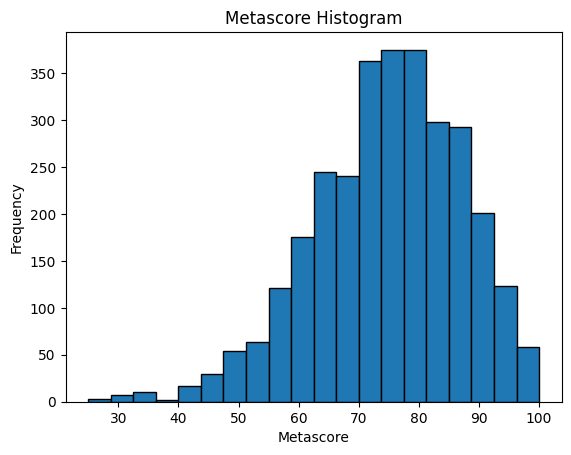

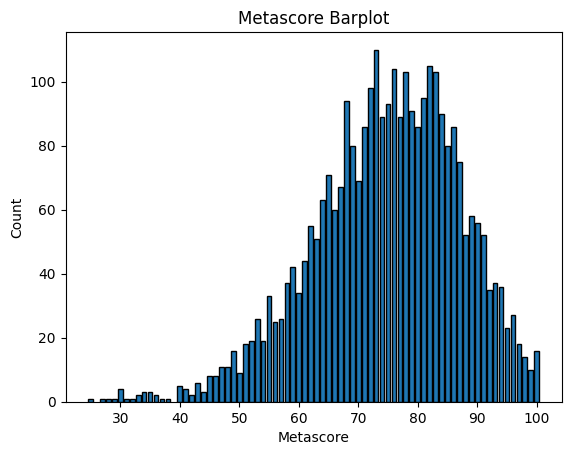

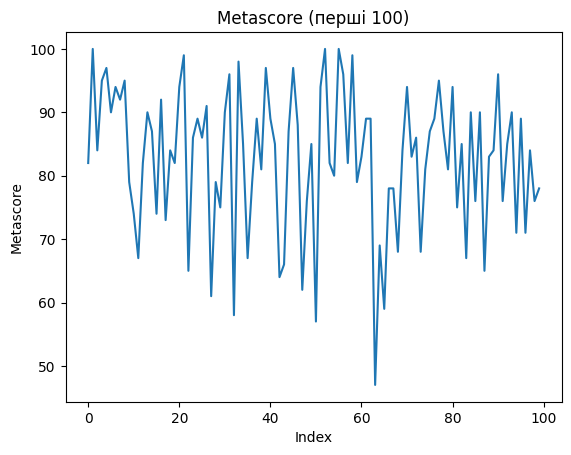

In [24]:
import matplotlib.pyplot as plt

# Гістограма
plt.hist(x, bins=20, edgecolor="black")
plt.title("Metascore Histogram")
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.savefig("histogram.png")
plt.show()

# Barplot
counts = x.value_counts().sort_index()
plt.bar(counts.index, counts.values, edgecolor="black")
plt.title("Metascore Barplot")
plt.xlabel("Metascore")
plt.ylabel("Count")
plt.savefig("barplot.png")
plt.show()

# Лінійний графік
plt.plot(df_clean["Metascore"].values[:100])
plt.title("Metascore (перші 100)")
plt.xlabel("Index")
plt.ylabel("Metascore")
plt.savefig("lineplot.png")
plt.show()